In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [44]:
df = pd.read_csv('Chocolate.csv')
df.head()

,Customer_ID,Age,Gender,Region,Brand_Preference,Purchase_Frequency,Average_Spend_INR,Purchase_Channel,Occasion,Mood,Satisfaction_Score
0,CUST0001,32,Male,South India,Amul Dark,Occasionally,92.0,Retail Store,Valentine's Day,Excited,4
1,CUST0002,22,Other,East India,Cadbury Dairy Milk,Weekly,1966.0,Supermarket,Birthday,Happy,4
2,CUST0003,35,Male,North India,Ferrero Rocher,Weekly,1424.0,Local Shop,New Year,Excited,5
3,CUST0004,53,Male,South India,Cadbury Dairy Milk,Weekly,1407.0,Online,New Year,Excited,2
4,CUST0005,46,Other,West India,Nestle KitKat,Occasionally,1895.0,Retail Store,Birthday,Relaxed,3


In [45]:
df.tail()

,Customer_ID,Age,Gender,Region,Brand_Preference,Purchase_Frequency,Average_Spend_INR,Purchase_Channel,Occasion,Mood,Satisfaction_Score
6525,CUST5630,14,Female,South India,Toblerone,Monthly,1569.0,Local Shop,Holi,Happy,4
6526,CUST5430,31,Male,West India,Munch,Monthly,396.0,Online,Birthday,Excited,1
6527,CUST6388,37,Other,North India,munch,Monthly,500.0,Online,Birthday,Excited,1
6528,CUST6005,39,Female,South India,Ferrero Rocher,Weekly,1849.0,Supermarket,Valentine's Day,Excited,2
6529,CUST5687,41,Other,North India,Cadbury Dairy Milk,Occasionally,1807.0,Supermarket,Birthday,Stressed,3


In [46]:
df.shape

(6530, 11)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6530 entries, 0 to 6529
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         6530 non-null   object 
 1   Age                 6530 non-null   int64  
 2   Gender              6530 non-null   object 
 3   Region              6530 non-null   object 
 4   Brand_Preference    6530 non-null   object 
 5   Purchase_Frequency  6530 non-null   object 
 6   Average_Spend_INR   6423 non-null   float64
 7   Purchase_Channel    6530 non-null   object 
 8   Occasion            6424 non-null   object 
 9   Mood                6424 non-null   object 
 10  Satisfaction_Score  6530 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 561.3+ KB


In [48]:
df.describe()

,Age,Average_Spend_INR,Satisfaction_Score
count,6530.000000,6423.000000,6530.000000
mean,36.561103,1038.357621,3.000766
std,13.986001,644.455893,1.416648
min,5.000000,50.000000,1.000000
25%,24.000000,535.500000,2.000000
50%,36.000000,1034.000000,3.000000
75%,48.000000,1511.500000,4.000000
max,85.000000,9932.000000,5.000000


In [49]:
df.isnull().sum()

Customer_ID             0
Age                     0
Gender                  0
Region                  0
Brand_Preference        0
Purchase_Frequency      0
Average_Spend_INR     107
Purchase_Channel        0
Occasion              106
Mood                  106
Satisfaction_Score      0
dtype: int64

In [50]:
(df.isnull().sum() / len(df)) * 100

Customer_ID           0.000000
Age                   0.000000
Gender                0.000000
Region                0.000000
Brand_Preference      0.000000
Purchase_Frequency    0.000000
Average_Spend_INR     1.638591
Purchase_Channel      0.000000
Occasion              1.623277
Mood                  1.623277
Satisfaction_Score    0.000000
dtype: float64

In [51]:
df.fillna({'Mood' : 'Unknown'}, inplace=True)

In [52]:
df['Average_Spend_INR'] = df['Average_Spend_INR'].fillna(df['Average_Spend_INR'].median())


In [53]:
df.isnull().sum()

Customer_ID             0
Age                     0
Gender                  0
Region                  0
Brand_Preference        0
Purchase_Frequency      0
Average_Spend_INR       0
Purchase_Channel        0
Occasion              106
Mood                    0
Satisfaction_Score      0
dtype: int64

In [54]:
df.fillna({'Occasion':'Unknown'}, inplace=True)

In [55]:
df.isnull().sum()

Customer_ID           0
Age                   0
Gender                0
Region                0
Brand_Preference      0
Purchase_Frequency    0
Average_Spend_INR     0
Purchase_Channel      0
Occasion              0
Mood                  0
Satisfaction_Score    0
dtype: int64

In [56]:
df.duplicated().sum()

np.int64(30)

In [57]:
df.drop_duplicates(inplace=True)

In [58]:
df[df.duplicated()]

df.duplicated().sum()


np.int64(0)

In [59]:
for col in ['Brand_Preference', 'Region', 'Purchase_Channel', 'Occasion', 'Mood']:
    df[col] = df[col].str.strip().str.title()


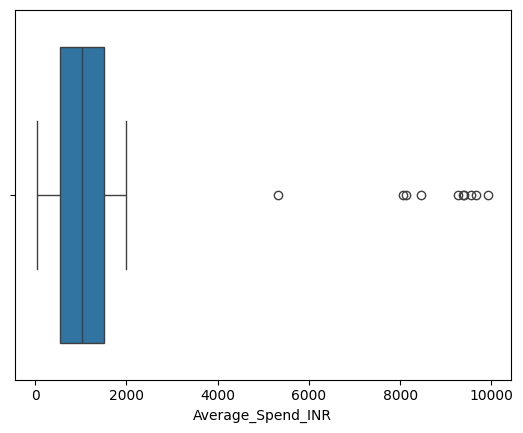

In [60]:
sns.boxplot(x=df['Average_Spend_INR'])
plt.show()

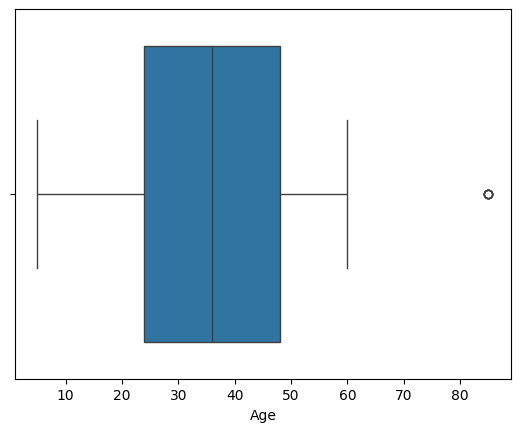

In [61]:
sns.boxplot(x=df['Age'])
plt.show()


In [62]:
Q1 = df['Average_Spend_INR'].quantile(0.25)
Q3 = df['Average_Spend_INR'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
df = df[(df['Average_Spend_INR'] >= lower_limit) & (df['Average_Spend_INR'] <= upper_limit)]


In [63]:
df = df[(df['Age'] >= 13) & (df['Age'] <= 60)]


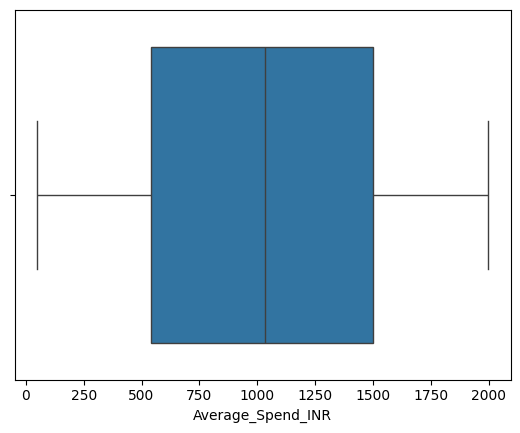

In [64]:
sns.boxplot(x=df['Average_Spend_INR'])
plt.show()


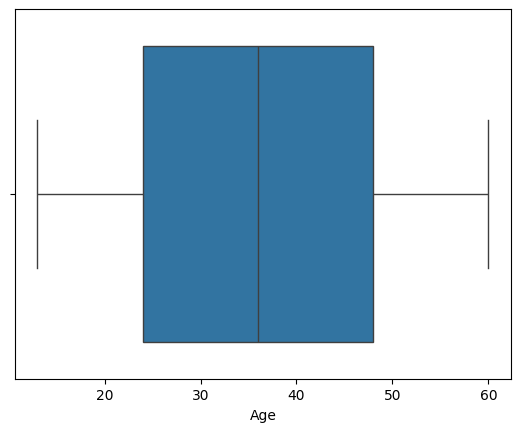

In [65]:
sns.boxplot(x=df['Age'])
plt.show()


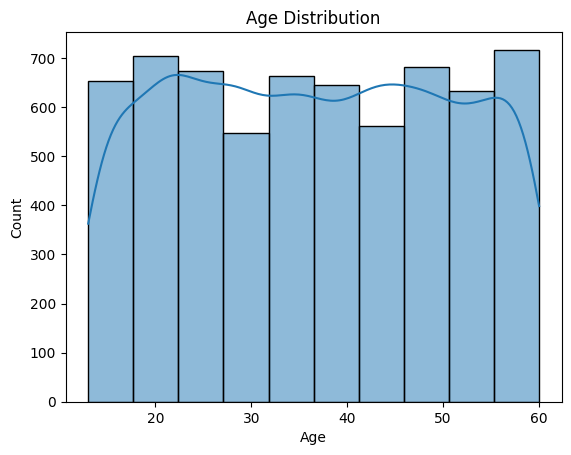

In [66]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()


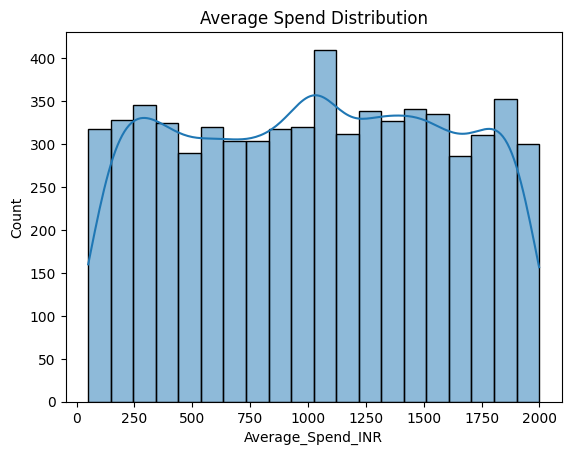

In [67]:
sns.histplot(df['Average_Spend_INR'], bins=20, kde=True)
plt.title('Average Spend Distribution')
plt.show()


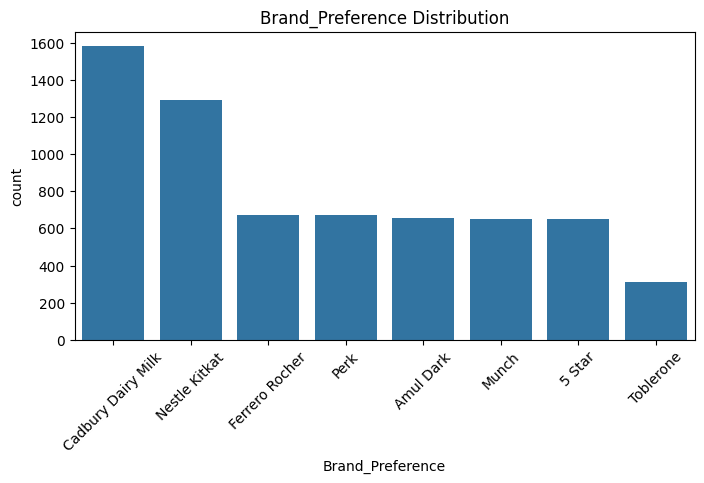

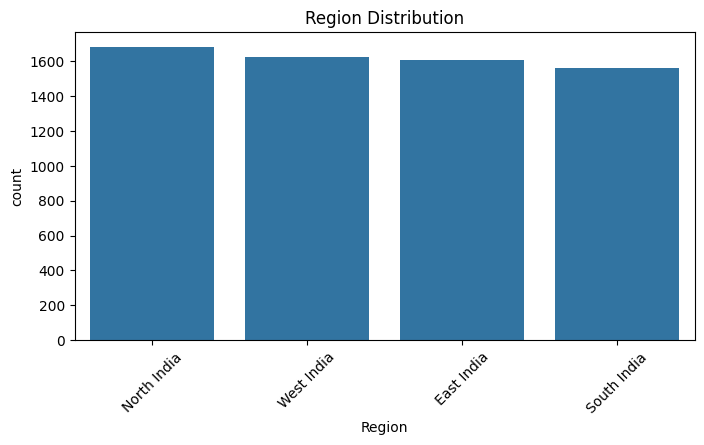

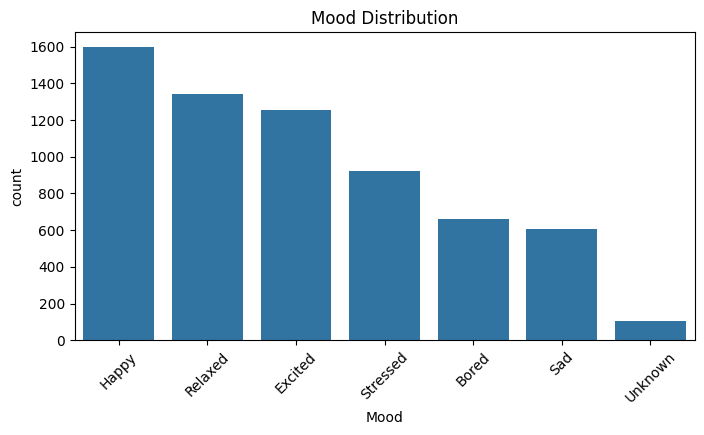

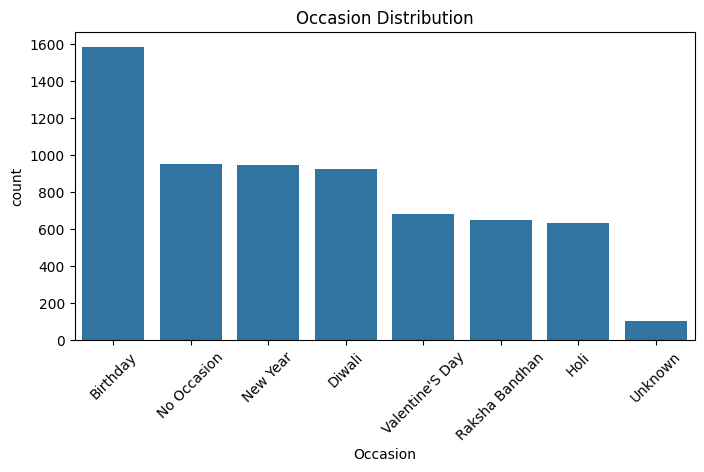

In [68]:
for col in ['Brand_Preference', 'Region', 'Mood', 'Occasion']:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()


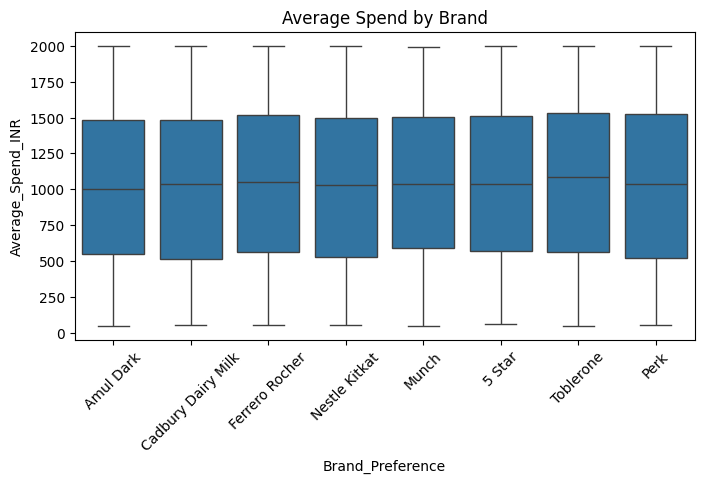

In [69]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Brand_Preference', y='Average_Spend_INR', data=df)
plt.xticks(rotation=45)
plt.title('Average Spend by Brand')
plt.show()


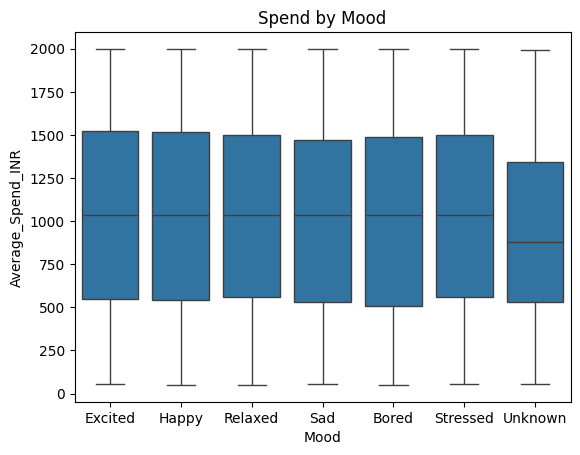

In [70]:
sns.boxplot(x='Mood', y='Average_Spend_INR', data=df)
plt.title('Spend by Mood')
plt.show()


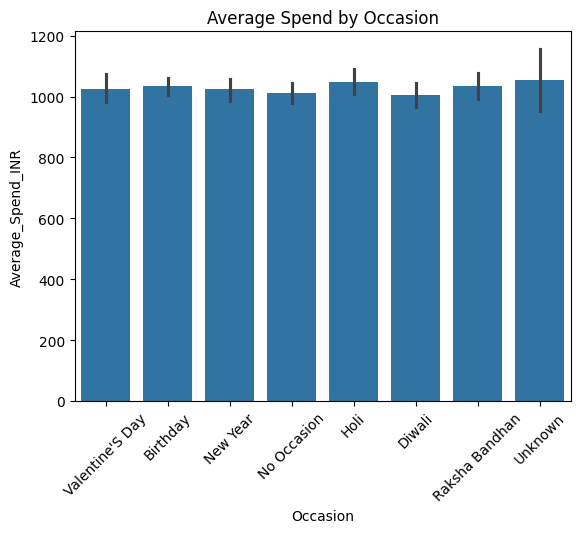

In [71]:
sns.barplot(x='Occasion', y='Average_Spend_INR', data=df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Average Spend by Occasion')
plt.show()


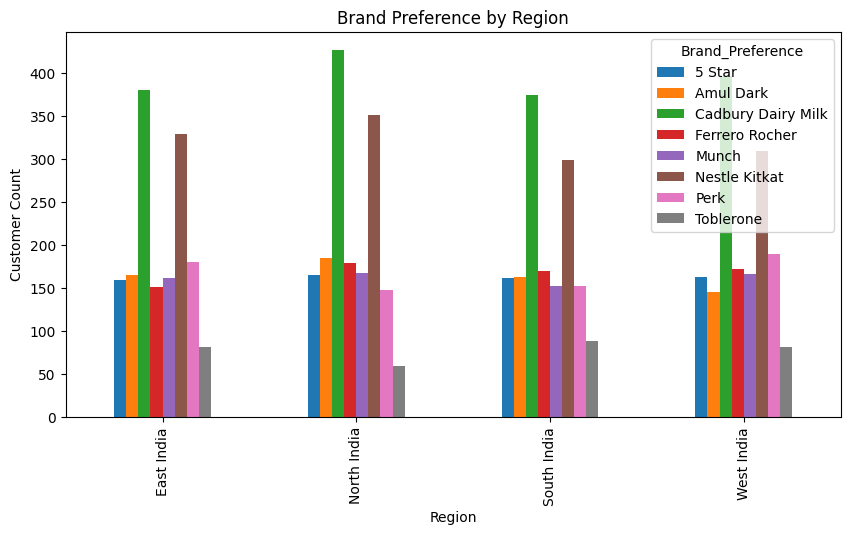

In [72]:
pd.crosstab(df['Region'], df['Brand_Preference']).plot(kind='bar', figsize=(10,5))
plt.title('Brand Preference by Region')
plt.ylabel('Customer Count')
plt.show()


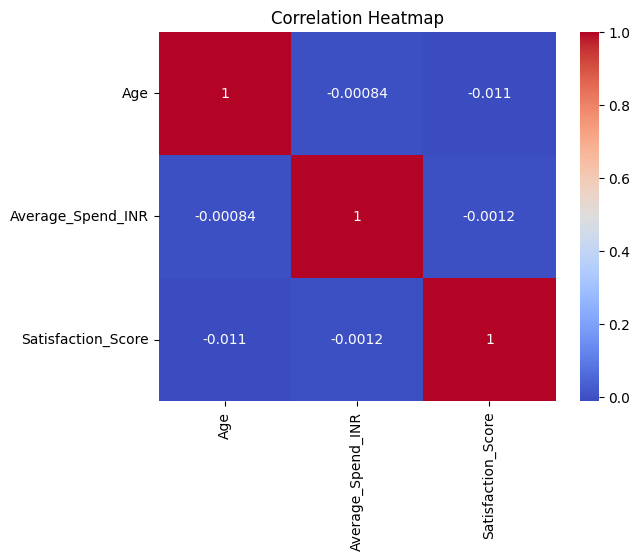

In [74]:
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [75]:
df.to_csv("chocolate_Cleaned.csv", index=False)
